In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\feature\niu_jia_ling"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\niu_jia_ling"
wind_turbine = "7"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature, speed=speed)

feature.shape: (3059, 75)
speed.shape: (3059, 1)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

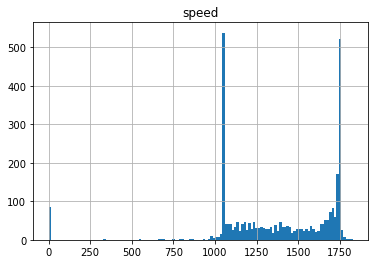

In [5]:
speed.hist(bins=128)

feature.shape: (2942, 75)
speed.shape: (2942, 1)


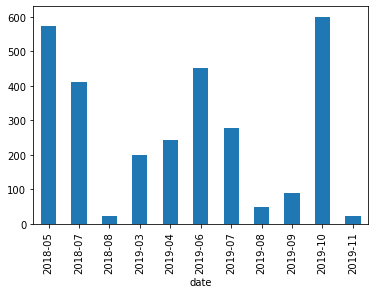

In [6]:
feature = feature[speed.speed >= 1000]
speed = speed[speed.speed >= 1000]

toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [7]:
# 划分train set, test set
feature_train = feature["2018-05": "2019-04"]
speed_train = speed["2018-05": "2019-04"]

feature_test = feature["2019-06": "2019-10"]
speed_test = speed["2019-06": "2019-10"]

toolkit.print_shape(feature_train=feature_train, speed_train=speed_train, feature_test=feature_test, speed_test=speed_test)

feature_train.shape: (1451, 75)
speed_train.shape: (1451, 1)
feature_test.shape: (1468, 75)
speed_test.shape: (1468, 1)


In [8]:
detector = model_entry.OutlierDetector()

In [9]:
detector.fit(feature_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











<AxesSubplot:xlabel='date'>

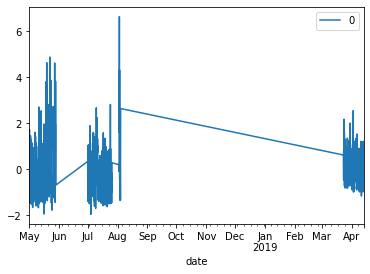

In [10]:
detector.decision_scores.plot()

In [11]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

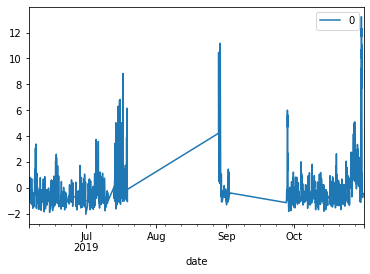

In [12]:
anomaly_scores.plot()

In [13]:
anomaly_scores[anomaly_scores[0] >= 4]

,0
date,
2019-07-14 00:00,4.562743
2019-07-14 01:00,5.030746
2019-07-14 23:00,6.288855
2019-07-15 13:00,6.320993
2019-07-15 17:00,6.767401
2019-07-15 20:00,4.852798
2019-07-15 23:00,5.353141
2019-07-16 00:00,6.831265
2019-07-16 14:00,5.031022


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

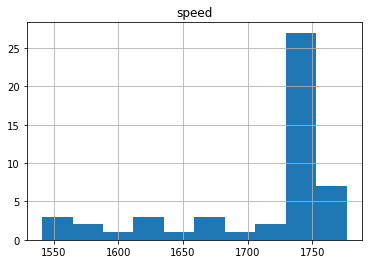

In [16]:
speed_test[speed_test.index.isin(anomaly_scores[anomaly_scores[0] >= 4].index)].hist()

In [15]:
anomaly_scores[anomaly_scores[0] >= 4].shape

(50, 1)